In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import arviz as az
import numpy as np

In [2]:
flows = pd.read_csv(r"..\..\UK-wood-mfa\build\flows.csv")
flows_obs= pd.read_csv(r'..\..\UK-wood-mfa\build\flows_obs.csv')
Observations = pd.read_excel(r"..\..\UK-wood-mfa\data\observations_with_references.xlsx")
flows_name = pd.read_excel(r'..\..\UK-wood-mfa\lists\flows_name.xlsx')
products_consumption = pd.read_excel(r'..\..\UK-wood-mfa\data_analysis\finished_products_consumption.xlsx')
products_consumption = products_consumption.set_index(['target'])



In [3]:
flows_name = list(flows_name.to_records())
flows_obs_list = list(flows_obs.to_records())

In [4]:
link = 'http://ukfires.org/analyses/UK-wood/system/'
Consumption = 'Consumption'

In [5]:
#UK consumption of finished products
link = 'http://ukfires.org/analyses/UK-wood/system/'
consumed_products = []
for flow in flows_name:
            consumption_flow_products = flows.loc[(flows['material'] == flow[3]) 
                                       & (flows['source'] == flow[1])
                                       & (flows['target'] == flow[2])]
            if (
                 ((link + 'SoftwoodRoundwoodDelivery') in flow[1])
                or ((link + 'HardwoodRoundwoodDelivery' ) in flow[1])
                or ((link + 'ForestResiduesDelivery' ) in flow[1])
            #     or ((link + 'InUseProductsLeave' ) in flow[1])
                or ((link + 'RecycledPaperDelivery' ) in flow[1])
                or ((link + 'RecycledWoodFibreDelivery' ) in flow[1])):
                    if ((('exports') not in flow[2])
                        and (('imports') not in flow[1])
                        and (('Manufacturing') not in flow[1])
                        ):
                      
                                                            
                                        consumption_flow_products = consumption_flow_products.set_index("source")
                          
                                        

                                        consumption_products_renamed= consumption_flow_products.rename(index={
                                                                                                              
                                                                link + 'SoftwoodRoundwoodDelivery' : 'Roundwood',
                                                                link + 'HardwoodRoundwoodDelivery': 'Roundwood',
                                                                link + 'ForestResiduesDelivery': 'ForestResidues',
                                                                link + 'RecycledWoodFibreDelivery': 'RecycledWoodFibre',
                                                                link + 'RecycledPaperDelivery': 'RecycledPaper',
                                                               # link + 'SoftwoodRoundwoodDelivery' : 'Total',
                                                              #  link + 'HardwoodRoundwoodDelivery': 'Total',
                                                              #  link + 'ForestResiduesDelivery': 'Total',
                                                              #  link + 'RecycledWoodFibreDelivery': 'Total',
                                                              #  link + 'RecycledPaperDelivery': 'Total',
                                                              #  link + 'PreConsumerWasteProductsConsumption' : 'Residues',
                                                                                                   })
                                        consumed_products.append(consumption_products_renamed)
                                        

                   
consumed_products = pd.concat(consumed_products)  


#print(consumed_products)                        
#consumed_products = pd.DataFrame(consumed_products, columns= [ "source", "target", "material", "value", "sample"])
consumed_products = consumed_products.groupby(['source','sample']).sum()
consumed_products = consumed_products.reset_index(level='sample')
consumed_products= consumed_products.reset_index(level='source')
consumed_products.to_clipboard()
consumed_products['value']=consumed_products['value'] / 1000000000
consumed_products

C:\Users\rla44\AppData\Local\Temp\ipykernel_13676\837395852.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consumed_products = consumed_products.groupby(['source','sample']).sum()


,source,sample,value,quantity
0,ForestResidues,0,8.834373,8.834373e+09
1,ForestResidues,1,9.552595,9.552595e+09
2,ForestResidues,2,5.467855,5.467855e+09
3,ForestResidues,3,6.019515,6.019515e+09
4,ForestResidues,4,8.453261,8.453261e+09
...,...,...,...,...
39995,Roundwood,9995,10.052815,1.005282e+10
39996,Roundwood,9996,9.749127,9.749127e+09
39997,Roundwood,9997,9.185885,9.185885e+09
39998,Roundwood,9998,9.505089,9.505089e+09


In [6]:
custom_order = [
   "Roundwood",
    'RecycledWoodFibre',
    'RecycledPaper',
  #  'Residues',
   'ForestResidues',
  #  'Total',


    
]

# Convert 'target' column to a categorical data type with the custom order
consumed_products["target"] = pd.Categorical(consumed_products["source"], categories=custom_order, ordered=True)

# Sort the DataFrame based on the 'target' column
consumed_products_sorted = consumed_products.sort_values(by="source")

# Reset the index to maintain a continuous index
consumed_products_sorted = consumed_products_sorted.reset_index(drop=True)


In [7]:
Means = consumed_products_sorted.groupby('target')['value'].mean()
df= pd.DataFrame(Means)


C:\Users\rla44\AppData\Local\Temp\ipykernel_13676\1218645502.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\rla44\AppData\Local\Temp\ipykernel_13676\1218645502.py:47: UserWarning: The palette list has more values (19) than needed (4), which may not be intended.
  sns.violinplot(


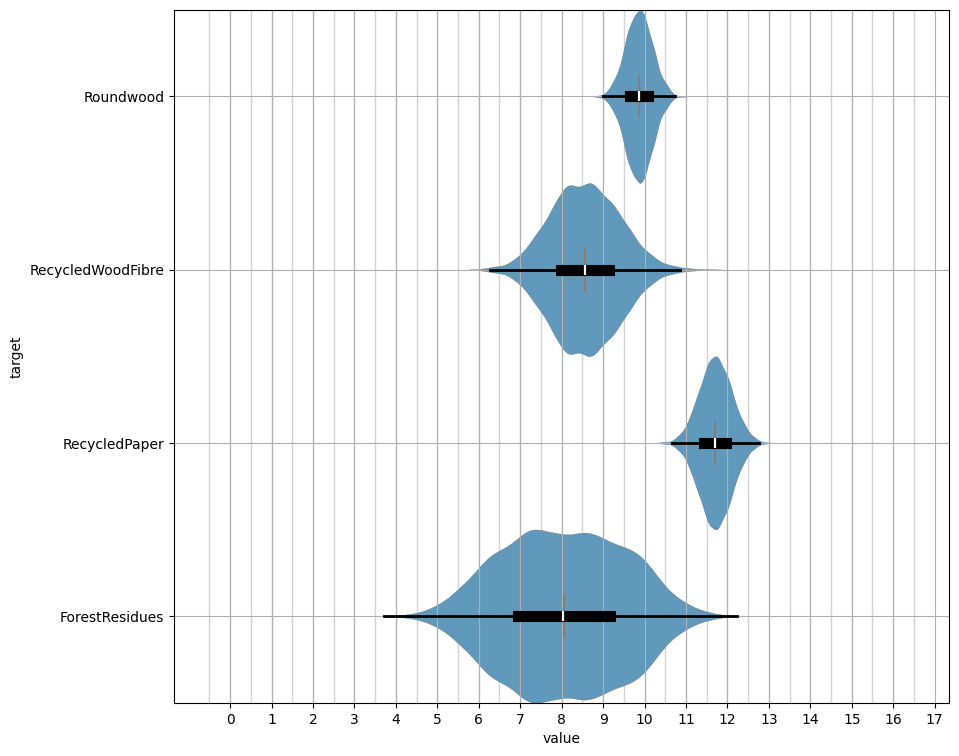

,Object,Uncertainty index,min,max,mean,median,diff_min,diff_max
0,Roundwood,0.177861,8.986716,10.741124,9.863922,9.866916,0.877206,-0.877202
1,RecycledWoodFibre,0.535890,6.265332,10.853807,8.562338,8.552647,2.297006,-2.291469
2,RecycledPaper,0.178838,10.663698,12.757606,11.708405,11.708354,1.044707,-1.049201
3,ForestResidues,1.058611,3.704996,12.223511,8.046882,8.032812,4.341886,-4.176629


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

         
# Set the figure size
fig =plt.figure(figsize=(10, 9))

# Define the range for vertical lines (from min to max x-values)
x_min = -1
x_max = 17
step = 0.5  # Interval between vertical lines

#plot mean on the graph
marker_size = 1000
plt.scatter(df['value'], df.index, marker='|', s=marker_size, color='grey', label='Mean',zorder=2)


# Plot vertical lines at 0.5 intervals
for x in np.arange(x_min + step, x_max, step):
    plt.axvline(x, color="lightgrey", linestyle="-", linewidth=1, zorder=0,)
    
density = 18
x = np.linspace(0, 17, density, endpoint=True)
plt.xticks(x,zorder=0)
# plt.axvline(0, c='k', alpha=0.5)

# Create a box plot with 'target' on the y-axis and 'value' on the x-axis
custom_palette = ["#529dcb", 
                  "#529dcb", 
                  "#529dcb",
                  "#529dcb",
                  "#ff2727",
                 "#ff2727",
                 "#935eaa",
                 "#935eaa",
                 "#935eaa",
                 "#935eaa",
                 "#935eaa",
                 "#935eaa",
                 "#78508a",
                 "#78508a",
                 "#78508a",
                 "#78508a",
                 "#78508a",
                 "#78508a",
                 "lightgrey",]
sns.violinplot(
    x="value",
    y="target",
    width=1,
   # hue= "target",
    palette=custom_palette,
    data=consumed_products,
    linewidth=0.2,
   # hue="target",
    density_norm="width",
    orient="h",
    inner_kws=dict(box_width=8, whis_width=2, color="black"),
    inner="box",
    cut=0,
    zorder=1,
)

# Set the title of the plot
plt.title("")

# Calculate the difference ratio for each unique 'target'
difference_ratios = []  # List to store the ratios

# Group the data by 'target'
grouped = consumed_products.groupby("target")

for name, group in grouped:
    data = group["value"]
    k = 1.5

    # Calculate quartiles and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bounds for outlier detection
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Exclude outliers
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    # Calculate minimum and maximum within the non-outlier range
    min_non_outlier = np.min(filtered_data)
    max_non_outlier = np.max(filtered_data)
    
    mean_val = group["value"].mean()
    median_val = group["value"].median()
    Diff_min =  mean_val - min_non_outlier
    Diff_max =  mean_val - max_non_outlier

    difference_ratio = (max_non_outlier - min_non_outlier) / mean_val

    difference_ratios.append((name, difference_ratio,min_non_outlier,max_non_outlier, mean_val,median_val, Diff_min, Diff_max) )  # Store the target name and ratio
    
    
difference_ratios
plt.grid(True)

plt.show()

difference_ratio_df = pd.DataFrame(difference_ratios, columns=['Object', 'Uncertainty index', 'min', 'max', 'mean', 'median', 'diff_min', 'diff_max'])
difference_ratio_df


In [9]:
# Sort the DataFrame by the 'Value' column in descending order
df = difference_ratio_df .sort_values(by='Uncertainty index', ascending=False)
df= df.set_index('Object')


# Create a gradient color map for the 'Value' column
def gradient_color(val):
    max_val = df['Uncertainty index'].max()
    min_val = df['Uncertainty index'].min()
    normalized_value = (val - min_val) / (max_val - min_val)
    r = int(255 * (1 - normalized_value))
    return f'background-color: rgba(255, {r}, 2, 0.5)'


styled_df = df.style.applymap(lambda x: gradient_color(x), subset=['Uncertainty index'])

# Display the styled DataFrame

styled_df

,Uncertainty index,min,max,mean,median,diff_min,diff_max
Object,,,,,,,
ForestResidues,1.058611,3.704996,12.223511,8.046882,8.032812,4.341886,-4.176629
RecycledWoodFibre,0.535890,6.265332,10.853807,8.562338,8.552647,2.297006,-2.291469
RecycledPaper,0.178838,10.663698,12.757606,11.708405,11.708354,1.044707,-1.049201
Roundwood,0.177861,8.986716,10.741124,9.863922,9.866916,0.877206,-0.877202


In [10]:
# Specify the file path along with the file name
file_path = r'C:/Users\rla44/OneDrive - University of Bath\MFA graphs/sankey_diagram_3102023'


# Save the plot with the specified file path
fig.savefig(file_path, format='pdf')

# Optionally, specify DPI for higher quality
# plt.savefig(file_path, format='pdf', dpi=300)